# Problem Set 4: Overlapping Generations Models
## Thomas Pellet
### Week 4 - OSE Lab


In [ ]:
# Example

def get_L(n1, n2, n3):
    '''
    -----------------
    Labor Market clearing
    '''
    L = n1 + n2 + n3
    return L

def get_K(b2, b3):
    K = b2 + b3
    return K

def get_r(b2, b3, params):
    α, A, δ = params
    r = 
    return r
    
    
def get_w(b2, b3)

#### Exercise 2.1

In [2]:
import numpy as np
from scipy.optimize import root


β, A, α, δ, σ = .96**20,1,.35,.6415, 3
nvec = np.array([1,1,0.2])
f_params = (nvec, A, α, δ, β)


# Return on labor
w = lambda b2, b3: (1-α)*A*((b2 + b3)/np.sum(nvec))**α

# Return on capital
r = lambda b2, b3: (α)*A*(np.sum(nvec)/(b2 + b3))**(1-α) - δ

# Uprime
uprime = lambda c: c**(-σ)

def SS(X):
    b2, b3 = X

    return [uprime(w(b2,b3)*nvec[0] - b2) - β*(1 + r(b2,b3))*uprime(w(b2,b3)*nvec[1] + \
            (1 + r(b2,b3))*b2 - b3), \
           uprime(w(b2,b3)*nvec[1] + (1 + r(b2,b3))*b2 - b3) - β*(1 + r(b2,b3))* \
           uprime((1 + r(b2,b3))*b3 + nvec[2]*w(b2,b3))]
    
def solveSS(bvec_guess):
    
    solve = root(SS,bvec_guess)
    b2_ss, b3_ss = solve.x
    
    k = b2_ss + b3_ss
    c1 = nvec[0]*w(b2_ss,b3_ss) - b2_ss
    c2 = nvec[1]*w(b2_ss,b3_ss) + (1+r(b2_ss,b3_ss))*b2_ss -b3_ss
    c3 = nvec[2]*w(b2_ss,b3_ss) + (1+r(b2_ss,b3_ss))*b3_ss
    
    return b2_ss, b3_ss, c1, c2, c3, k
    

def feasible(f_params, bvec_guess):
    
    #Initiate vector of outputs
    b_cnstr = np.empty([2,], dtype='bool_')
    c_cnstr = np.empty([3,], dtype='bool_')
    K_cnstr = np.empty([1,], dtype='bool_')
    K_cnstr[0] = False
    c = np.empty([3,], dtype='float')
    

    b2_ss, b3_ss, c1, c2, c3, k = solveSS(bvec_guess)
    print("B2 ",b2_ss, "B3 ", b3_ss)
    c = np.array([c1,c2,c3])
    print(c)
    if k <= 0:
        K_cnstr[0] = True
    
    for i, item in enumerate(c):
        if item <= 0:
            c_cnstr[i] = True           
        else:
            c_cnstr[i] = False
    
    b_cnstr[:] = False
    if   c_cnstr[0] == True:
        b_cnstr[0] = True
        
    elif c_cnstr[1] == True:
        b_cnstr[0] = True
        b_cnstr[1] = True
        
    elif c_cnstr[2] == True:
        b_cnstr[1] = True
    print(" \t \t Period 1 ", "Period 2 ", "Period 3 \n","C constrained \t", c_cnstr[0], "\t", c_cnstr[1], "\t", c_cnstr[2], "\n", "B constrained \t", b_cnstr[0], "\t", b_cnstr[1])
    
    return b_cnstr, c_cnstr, K_cnstr




    

In [3]:
bvec_guess = np.array([1.0, 1.2])
result = feasible(f_params, bvec_guess)

B2  1.9468539249297103e+46 B3  4.191494645495242e+45
[-1.94685392e+46  2.78797668e+45  1.50265083e+45]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 True 	 False 	 False 
 B constrained 	 True 	 False


In [4]:
bvec_guess = np.array([0.06, -0.001])
result = feasible(f_params, bvec_guess)

B2  0.06 B3  -0.001
[0.12317391 0.42635236 0.03259848]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 False 	 False 	 False 
 B constrained 	 False 	 False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [5]:
bvec_guess = np.array([0.1, 0.1])
result = feasible(f_params, bvec_guess)

B2  0.01931271933217477 B3  0.05841151349308521
[0.18241249 0.20961516 0.2408745 ]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 False 	 False 	 False 
 B constrained 	 False 	 False


### Exercise 2.2

In [6]:
import time
from matplotlib import pyplot as plt



def get_SS(params, bvec_guess, SS_graphs):
    β, A, α, δ, σ, nvec, L, SS_tol = params
    start_time = time.clock()
    EulErr_ss = np.empty([2,], dtype='float')
    
    b2_ss, b3_ss, c1, c2, c3, K_ss = solveSS(bvec_guess)
    b_ss = np.array([b2_ss,b3_ss])
    c_ss = np.array([c1,c2,c3])
    C_ss = c1 + c2 + c3
    Y_ss = A*K_ss**α*L**(1-α)
    w_ss = w(b2_ss,b3_ss)
    r_ss = r(b2_ss,b3_ss)
    EulErr_ss = SS([b2_ss,b3_ss]) 
    RCerr_ss = Y_ss - C_ss - δ*K_ss
      
    ss_time = time.clock() - start_time # Place at end of get_SS()
  
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs == True:
        plt.plot([20,40,60], ss_output['c_ss'], '-r')
        plt.title('Consumption distribution')
        plt.show()
        plt.plot([40,60],ss_output['b_ss'],'-g')
        plt.title('Savings distribution')
        plt.show()
        
    
    return ss_output
    
    
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


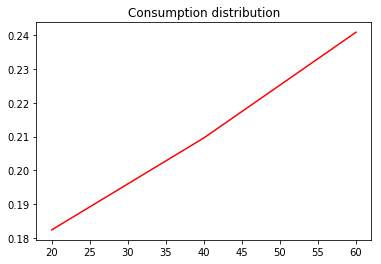

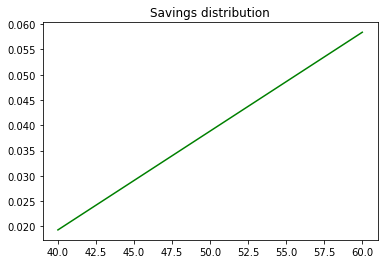

In [7]:
L = np.sum(nvec)
SS_tol = 1e10-5
params = β, A, α, δ, σ, nvec, L, SS_tol
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True
ss_output = get_SS(params, bvec_guess, SS_graphs)

In [8]:
print(ss_output)

{'b_ss': array([0.01931272, 0.05841151]), 'c_ss': array([0.18241249, 0.20961516, 0.2408745 ]), 'w_ss': 0.20172520884942252, 'r_ss': 2.4330467299114265, 'K_ss': 0.07772423282525998, 'Y_ss': 0.682762245336507, 'C_ss': 0.6329021499791027, 'EulErr_ss': [-1.3926637620897964e-12, 2.6432189770275727e-12], 'RCerr_ss': 4.85722573273506e-17, 'ss_time': 0.0023334000000012622}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


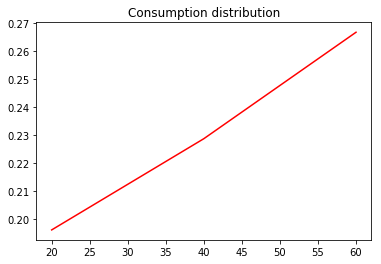

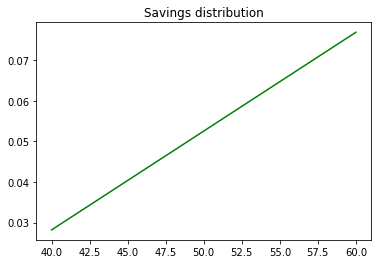

In [9]:
L = np.sum(nvec)
SS_tol = 1e10-5
β = 0.55
params = β, A, α, δ, σ, nvec, L, SS_tol
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True
ss_output = get_SS(params, bvec_guess, SS_graphs)

If $\beta$ increases, agents save more because they are more patient and consume more because the return on capital is higher. The saving rate however is higher.

#### Exercise 2.4

In [70]:
import numpy as np
from scipy.optimize import root

tol = 1e-9
ξ = .6
T = 50
ξ = 0.2
bvec_guess = np.array([0.1, 0.1])


def euleryoung(X, *params):
    #print("params", params)
    b2, b3 = X
    w1,w2,w3,r1,r2,r3 = params
    # Problem for the young
    error1 = uprime(w1 - b2) - β*(1+r2)*uprime(w2 + (1+r2)*b2 - b3)
    error2 = uprime(w2 + (1+r2)*b2 - b3) - β*(1+r3)*uprime((1+r3)*b3+0.2*w3)

    error = [error1, error2]

    return error
    

def eulerma(X,*params):
    b3 = X
    w1,w2,r1,r2,b2 = params
    # Problem for the middle aged
    error = uprime(w1 + (1+r1)*b2 - b3) - β*(1+r2)*uprime((1+r2)*b3+0.2*w2)
    return error

# Return on labor
w = lambda b2, b3: (1-α)*A*((b2 + b3)/np.sum(nvec))**α

# Return on capital
r = lambda b2, b3: (α)*A*(np.sum(nvec)/(b2 + b3))**(1-α) - δ


def TPI(tol,T,w,r,euleryoung,eulerma):
    
    params = β, A, α, δ, σ, nvec, L, SS_tol
    ss_output = get_SS(params, bvec_guess, False)
    
    bvec_init = np.array([ss_output['b_ss'][0]*0.8, \
                           ss_output['b_ss'][0]*1.1])
    K_init = np.sum(bvec_init)

    #Linear guess for path of aggregate capital
    K = np.zeros(T+6)
    K[0:T] = np.linspace(K_init,ss_output['K_ss'],T)
    K[T+1:T+6] = ss_output['K_ss']
    b = np.empty([T+6,2])
    W = np.empty([T+6,1])
    R = np.empty([T+6,1])
    C = np.empty([T+6,2])
    Y = np.empty([T+6,2])
    ProdErr = np.empty([T+6,2])
    EulerErr = np.empty([T+6,2])
    # Iterate over the K path
    while True:
        # Update prices
        W = w(K/2,K/2)
        R = r(K/2,K/2)
        
        #Solve the Middle Age problem
        params = W[0],W[1],R[0],R[1],b[0,0]
        #print(np.shape(params))
        #print(params)
        b[1,1] = root(eulerma,b[0,1],args=(params)).x
        
        # Time Path Iteration
        for i,item in enumerate(K[:T+4]):
            #print("period ", i)
            paramyoung = W[i],W[i+1],W[i+2],R[i],R[i+1],R[i+2]
            #paramyoung = np.array([W[i],W[i+1],W[i+2],R[i],R[i+1],R[i+3]])
            #print(np.shape(paramyoung))
            #print(paramyoung)
            guess = [b[i,0],b[i+1,1]]
            solve = root(euleryoung,guess,args=(paramyoung)).x
            b[i+1,0], b[i+2,1] = solve
            C[i,0] =  W[i] + (1+R[i])*b[i,0] - b[i+1,1]
            C[i,1] =  0.2*W[i] + (1+R[i])*b[i,1]
            Y[i] = A*K[i]**α*L**(1-α)
            ProdErr[i] = Y[i] - np.sum(C[i,:]) - b[i+1,0] - b[i+1,1] + (1-δ)*(b[i,0] - b[i,1])
            
        
        Knew = np.sum(b,axis=1)
        #print(abs(Knew - K))
        ϵ = np.sum(abs(Knew - K),axis=0)
        print(ϵ)
        if ϵ < tol:
            print("Converged")
            print(ϵ)
            break
            
        else: K = ξ*Knew + (1-ξ)*K
    
    TPI_output = {
    'b': b, 'w': W, 'r': W,
    'K': K, 'Y': Y, 'C': C, 'ProdErr': ProdErr}
#     'EulErr': EulErr, 'ProdErr': ProdErr}
    return TPI_output

        

In [71]:
        
result = TPI(tol,T,w,r,euleryoung,eulerma)  


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
C:\ProgramD

4.4896747552505705
3.591739804200456
2.8733918433603653
2.2987134746882925
1.838970779750634
1.4711766238005073
1.176941299040406
0.9415530392323248
0.7532424313858599
0.6025939451086879
0.4820751560869504
0.3856601248695603
0.3085280998956483
0.24682247991651862
0.1974579839332149
0.15796638714657193
0.12637310971725757
0.10109848777380605
0.08087879021904484
0.06470303217523588
0.0517624257401887
0.041409940592150966
0.03312795247372077
0.02650236197897662
0.021201889583181296
0.01696151166654504
0.013569209333236031
0.010855367466588826
0.008684293973271062
0.006947435178616849
0.00555794814289348
0.004446358514314784
0.0035570868114518277
0.002845669449161462
0.0022765355593291695
0.001821228447463336
0.0014569827579706688
0.0011655862063765351
0.0009324689651012282
0.0007459751720809826
0.000596780137664786
0.00047742411013182895
0.0003819392881054632
0.0003055514304843705
0.0002444411443874964
0.00019555291550999717
0.00015644233240799774
0.00012515386592639818
0.0001001230927411

In [73]:
print(result)

{'b': array([[0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
       [0.00000000e+000, 6.95261873e-310],
     